Предварительная обработка данных

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

file_path = 'SMSSpamCollection.csv'  
data = pd.read_csv(file_path, sep='\t', header=None, names=['Label', 'Message'])

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Label'] = label_encoder.fit_transform(data['Label'])

X = data['Message']
y = data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

Построение моделей

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_vec, y_train)

nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train_vec, y_train)

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_vec, y_train)

GradientBoostingClassifier(random_state=42)

Оценка качества моделей

In [8]:
from sklearn.metrics import classification_report, accuracy_score

models = {
    'Logistic Regression': lr_model,
    'Naive Bayes': nb_model,
    'Random Forest': rf_model,
    'Gradient Boosting': gb_model
}

for name, model in models.items():
    print(f"--- {name} ---")
    y_pred = model.predict(X_test_vec)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    print("\n")

--- Logistic Regression ---
Accuracy: 0.9758
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       0.99      0.83      0.90       149

    accuracy                           0.98      1115
   macro avg       0.98      0.91      0.94      1115
weighted avg       0.98      0.98      0.97      1115



--- Naive Bayes ---
Accuracy: 0.9848
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       966
        spam       0.96      0.92      0.94       149

    accuracy                           0.98      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.98      0.98      0.98      1115



--- Random Forest ---
Accuracy: 0.9749
              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       966
        spam       1.00      0.81      0.90       149

    accuracy                           0.97      1115
   

Анализ данных

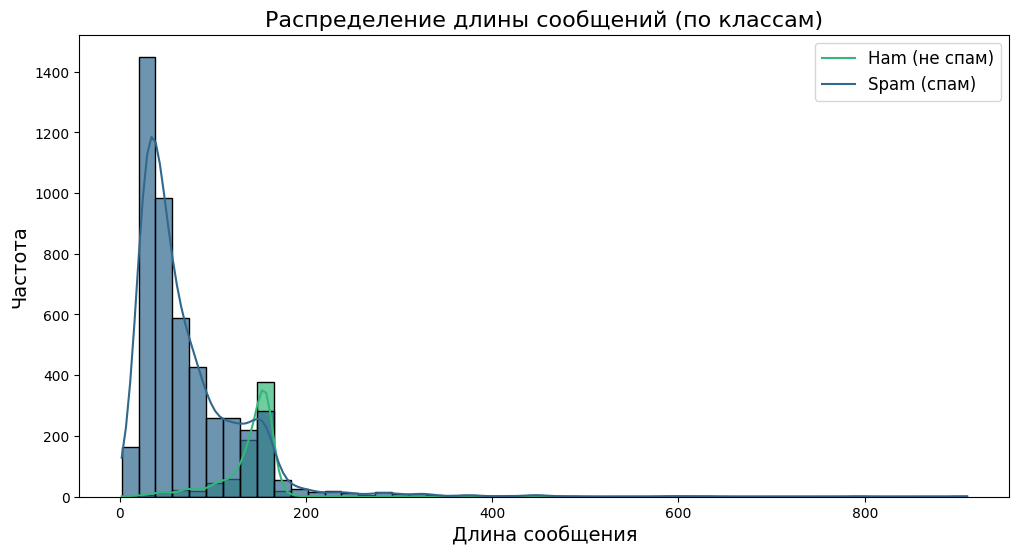

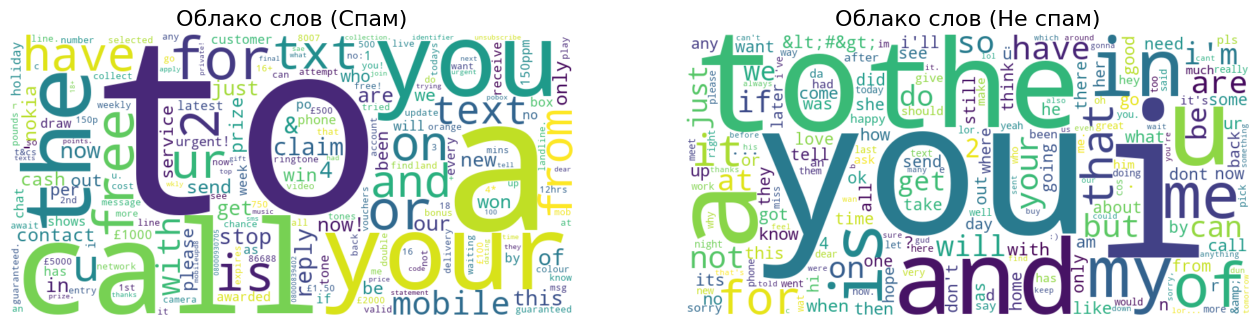

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud


data['MessageLength'] = data['Message'].apply(len)


plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='MessageLength', hue='Label', bins=50, kde=True, palette='viridis', alpha=0.7)
plt.title('Распределение длины сообщений (по классам)', fontsize=16)
plt.xlabel('Длина сообщения', fontsize=14)
plt.ylabel('Частота', fontsize=14)
plt.legend(['Ham (не спам)', 'Spam (спам)'], fontsize=12)
plt.show()

spam_messages = data[data['Label'] == 1]['Message']
ham_messages = data[data['Label'] == 0]['Message']

def get_word_frequencies(messages):
    all_words = ' '.join(messages).lower().split()
    return Counter(all_words)

spam_word_freq = get_word_frequencies(spam_messages)
ham_word_freq = get_word_frequencies(ham_messages)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(spam_word_freq)
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Спам', fontsize=16)

plt.subplot(1, 2, 2)
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(ham_word_freq)
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Не спам', fontsize=16)

plt.show()